In [ ]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

data0 = np.array([[2.20, 2.04, 1.95, 1.79, 1.91], [1.99, 2.19, 2.23, 2.22, 2.58]]).T
data1 = np.array([[2.31, 2.49, 2.94, 2.20, 1.97], [2.53, 2.20, 1.88, 2.68, 2.93]]).T
data2 = np.array([[1.02, 1.54, 0.82, 2.93, 0.76], [1.15, 0.95, 1.05, 0.97, 1.10]]).T


means0 = np.mean(data0, axis=0)
stds0 = np.std(data0, axis=0)
means1 = np.mean(data1, axis=0)
stds1 = np.std(data1, axis=0)
means2 = np.mean(data2, axis=0)
stds2 = np.std(data2, axis=0)

prob_c0 = 1/3
prob_c1 = 1/3
prob_c2 = 1/3

Xval = np.array([[2.1, 2.3]])

ll_0 = np.log(prob_c0) + np.sum(norm.logpdf(Xval, loc=means0, scale=stds0), axis=1)
ll_1 = np.log(prob_c1) + np.sum(norm.logpdf(Xval, loc=means1, scale=stds1), axis=1)
ll_2 = np.log(prob_c2) + np.sum(norm.logpdf(Xval, loc=means2, scale=stds2), axis=1)

if ll_1<ll_2 and ll_0<ll_2:
  cls = 'species 3'
elif ll_0<ll_1 and ll_2<ll_1:
  cls = 'species 2'
else:
  cls = 'species 1'
print('species 1:', ll_0,'species 2:', ll_1,'species 3:', ll_2)
print('class:', cls)

species 1: [0.26742508] species 2: [-1.26646159] species 3: [-137.82362596]
class: species 1


In [ ]:
data0

array([[2.2 , 1.99],
       [2.04, 2.19],
       [1.95, 2.23],
       [1.79, 2.22],
       [1.91, 2.58]])

In [ ]:
print(ll_0, ll_1, ll_2)

[0.26742508] [-1.26646159] [-137.82362596]


In [ ]:
cov0 = np.cov(data0.T)
cov0

array([[ 0.02347, -0.01942],
       [-0.01942,  0.04527]])

In [ ]:
cov1 = np.cov(data1.T)
cov1

array([[ 0.13277, -0.14761],
       [-0.14761,  0.16923]])

In [ ]:
cov2 = np.cov(data2.T)
cov2

array([[ 0.81248 , -0.051495],
       [-0.051495,  0.00718 ]])

In [ ]:
y = data0[:,0]
y

array([2.2 , 2.04, 1.95, 1.79, 1.91])

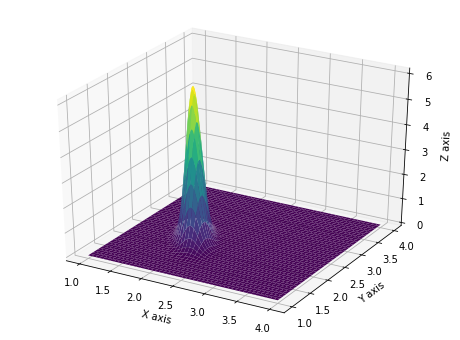

In [ ]:
x = np.linspace(1,4,500)
y = np.linspace(1,4,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal(means0, cov0)

fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
# plt.savefig('cov1.jpg')
plt.show()


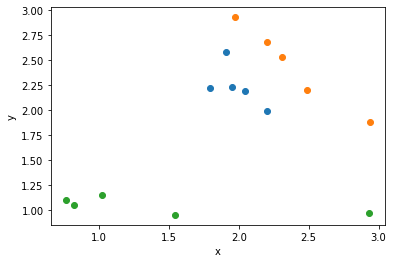

In [ ]:
fig, ax = plt.subplots() # This generates us a named figure and axes
ax.scatter(data0[:,0], data0[:,1], label = 'Data') # We generate a scatterplot of the data on the axes.
ax.scatter(data1[:,0], data1[:,1], label = 'Data')
ax.scatter(data2[:,0], data2[:,1], label = 'Data')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('scatter.jpg')

In [45]:
import numpy as np
D = np.array([0.7, 0.3]) # negative positive -> 0, 1
F = np.array([0.6, 0.4])
HD = np.array([[0.9, 0.5], [0.1, 0.5]])
CDF = np.array([[[0.9, 0.1], [0.2, 0]], [[0.1, 0.9], [0.8, 1]]])
print('D =',D)
print('F =',F)
print('HD =',HD)
print('CDF =',CDF)
denominator1 = 0
for h in range(2):
  for d in range(2):
      denominator1 = denominator1 + D[d] * HD[h,d] * CDF[1, d, 1] * F[1]
nominator1 = 0
for h in range(2):
      nominator1 = nominator1 + D[1] * HD[h,1] * CDF[1, 1, 1] * F[1]
print('nominator1:',nominator1)
print('denominator1:', denominator1)
DCF =  nominator1 / denominator1
print('DCF:', DCF)
denominator2 = 0
for d in range(2):
  for f in range(2):
      denominator2 = denominator2 + D[d] * HD[1,d] * CDF[1, d, f] * F[f]
nominator2 = 0
for d in range(2):
      nominator2 = nominator2 + D[d] * HD[1,d] * CDF[1, d, 1] * F[1]
print('nominator2:', nominator2)
print('denominator2:', denominator2)
FCH =  nominator2 / denominator2
print('FCH:', FCH)

D = [0.7 0.3]
F = [0.6 0.4]
HD = [[0.9 0.5]
 [0.1 0.5]]
CDF = [[[0.9 0.1]
  [0.2 0. ]]

 [[0.1 0.9]
  [0.8 1. ]]]
nominator1: 0.12
denominator1: 0.37200000000000005
DCF: 0.32258064516129026
nominator2: 0.0852
denominator2: 0.1614
FCH: 0.5278810408921933


In [31]:
F = np.array([0.6, 0.4])
F

array([0.6, 0.4])

In [32]:
HD = np.array([[0.9, 0.5], [0.1, 0.5]])
HD

array([[0.9, 0.5],
       [0.1, 0.5]])

In [33]:
CDF = np.array([[[0.9, 0.1], [0.2, 0]], [[0.1, 0.9], [0.8, 1]]])
CDF

array([[[0.9, 0.1],
        [0.2, 0. ]],

       [[0.1, 0.9],
        [0.8, 1. ]]])

In [34]:
denominator1 = 0
for h in range(2):
  for d in range(2):
      denominator1 = denominator1 + D[d] * HD[h,d] * CDF[1, d, 1] * F[1]
print(denominator1)

0.37200000000000005


In [35]:
nominator1 = 0
for h in range(2):
      nominator1 = nominator1 + D[1] * HD[h,1] * CDF[1, 1, 1] * F[1]
print(nominator1)

0.12


In [36]:
DCF =  nominator1 / denominator1
print(DCF)

0.32258064516129026


In [37]:
denominator2 = 0
for d in range(2):
  for f in range(2):
      denominator2 = denominator2 + D[d] * HD[1,d] * CDF[1, d, f] * F[f]
print(denominator2)

0.1614


In [38]:
nominator2 = 0
for d in range(2):
      nominator2 = nominator2 + D[d] * HD[1,d] * CDF[1, d, 1] * F[1]
print(nominator2)

0.0852


In [39]:
FCH =  nominator2 / denominator2
print(FCH)

0.5278810408921933


In [64]:
import numpy as np
R = np.array([[2, -0.5, 10], [-0.5, -0.5, -0.5]])

In [164]:
def bellman(R, gamma, U):
  U_update = np.zeros([4, 5])
  actions = np.array([[0, -1, 0, 1, 0], [-1, 0, 1, 0, -1], [0, 1, 0, -1, 0], [1, 0, -1, 0, 1]])
  n = U.shape[0]
  m = U.shape[1]
  points = np.array([[1,0], [1, 1], [0, 0], [0, 1], [1, 2]]) + 1

  for point in points:
    r = point[0]
    c = point[1]
    PU = []
    for action in actions:
      pu = 0
      for k in range(4):
        x = r + action[k]
        y = c + action[k+1]
        if k!=2:
            if k==0:
              p = 0.8
            elif k==1:
              p = 0.1
            else:
              p = 0.1
            pu = pu + p * U[x, y]
      PU.append(pu)
    U_update[r, c] = R[r, c] + gamma * max(PU)
    U_update[1,3] = 10
    U_update[0, 1:4] = U_update[1, 1:4]
    U_update[3, 1:4] = U_update[2, 1:4]
    U_update[1:3, 0] = U_update[1:3, 1]
    U_update[1:3, 4] = U_update[1:3, 3]
  return U_update

In [237]:
def bellman(R, gamma, U, iter, iteration ):
  if iteration == iter:
    return U[1:3, 1:4]
  U_update = np.zeros([4, 5])
  actions = np.array([[0, -1, 0, 1, 0], [-1, 0, 1, 0, -1], [0, 1, 0, -1, 0], [1, 0, -1, 0, 1]])
  n = U.shape[0]
  m = U.shape[1]
  points = np.array([[1,0], [1, 1], [0, 0], [0, 1], [1, 2]]) + 1

  for point in points:
    r = point[0]
    c = point[1]
    PU = []
    for action in actions:
      pu = 0
      for k in range(4):
        x = r + action[k]
        y = c + action[k+1]
        if k!=2:
            if k==0:
              p = 0.8
            elif k==1:
              p = 0.1
            else:
              p = 0.1
            pu = pu + p * U[x, y]
      PU.append(pu)
    U_update[r, c] = R[r, c] + gamma * max(PU)
    U_update[1,3] = 10
    U_update[0, 1:4] = U_update[1, 1:4]
    U_update[3, 1:4] = U_update[2, 1:4]
    U_update[1:3, 0] = U_update[1:3, 1]
    U_update[1:3, 4] = U_update[1:3, 3]
  return bellman(R, gamma, U_update, iter + 1, iteration)

In [242]:
R = np.array([[0,2, -0.5, 10,0], [2, 2, -0.5, 10, 10], [-0.5, -0.5, -0.5, -0.5, -0.5], [0, -0.5, -0.5, -0.5, 0]])
U = R
gamma = 0.01
bellman(R,gamma, U, 1, 100)


array([[ 2.01773872, -0.4209252 , 10.        ],
       [-0.48484721, -0.50427317, -0.4209252 ]])

In [146]:
R = np.array([[0,2, -0.5, 10,0], [2, 2, -0.5, 10, 10], [-0.5, -0.5, -0.5, -0.5, -0.5], [0, -0.5, -0.5, -0.5, 0]])
U = R
print(U)
gamma = 0.9
U1 = bellman(R, 0.9, U)
print('******************')
print(U1[1:3,1:4])
U2 = bellman(R, 0.9, U1)
print('******************')
print(U2[1:3, 1:4])
print('******************')
U3 = bellman(R, 0.9, U2)
print(U3[1:3, 1:4])

[[ 0.   2.  -0.5 10.   0. ]
 [ 2.   2.  -0.5 10.  10. ]
 [-0.5 -0.5 -0.5 -0.5 -0.5]
 [ 0.  -0.5 -0.5 -0.5  0. ]]
******************
[[ 3.575  6.61  10.   ]
 [ 0.85  -0.95   6.61 ]]
******************
[[ 7.15745  7.2094  10.     ]
 [ 2.065    4.9306   7.2094 ]]
******************
[[ 8.4463805  7.7926    10.       ]
 [ 5.282968   5.783368   7.7926   ]]


In [103]:
R = np.array([[0,2, -0.5, 10,0], [2, 2, -0.5, 10, 10], [-0.5, -0.5, -0.5, -0.5, -0.5], [0, -0.5, -0.5, -0.5, 0]])
U = np.zeros([4, 5])
U_update = np.zeros([4, 5])
actions = np.array([[0, -1, 0, 1, 0], [-1, 0, 1, 0, -1], [0, 1, 0, -1, 0], [1, 0, -1, 0, 1]])

n = init.shape[0]
m = init.shape[1]
points = np.array([[1,0], [1, 1], [0, 0], [0, 1], [1, 2], [0, 2]]) + 1

for point in points:
  r = point[0]
  c = point[1]
  PU = []
  for action in actions:
    pu = 0
    for k in range(4):
      x = r + action[k]
      y = c + action[k-1]
      if k!=2:
          if k==0:
            p = 0.8
          elif k==1:
            p = 0.1
          else:
            p = 0.1
          pu = pu + p * U[x, y]
    PU.append(pu)
  U_update[r, c] = R[r, c] + 0.9 * max(PU)
  print(U_update)



[[ 0.   0.   0.   0.   0. ]
 [ 0.   2.  -0.5 10.   0. ]
 [ 0.  -0.5 -0.5 -0.5  0. ]
 [ 0.   0.   0.   0.   0. ]]


In [94]:
U[1, 1]

0.0

In [90]:
points = np.array([[1,0], [1, 1], [0, 0], [0, 1], [1, 2], [0, 2]])
points + 1

array([[2, 1],
       [2, 2],
       [1, 1],
       [1, 2],
       [2, 3],
       [1, 3]])

In [87]:
U = np.array([[0,2, -0.5, 10,0], [2, 2, -0.5, 10, 10], [-0.5, -0.5, -0.5, -0.5, -0.5], [0, -0.5, -0.5, -0.5, 0]])
U

array([[ 0. ,  2. , -0.5, 10. ,  0. ],
       [ 2. ,  2. , -0.5, 10. , 10. ],
       [-0.5, -0.5, -0.5, -0.5, -0.5],
       [ 0. , -0.5, -0.5, -0.5,  0. ]])